In [1]:
import pandas as pd
df = pd.read_csv("C:\\Internship\\2264002\\Meters\\202103021197eim1_readings.csv")

In [2]:
df = df[['date','curr_w']]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['curr_w']])
df['curr_w'] = scaler.transform(df[['curr_w']])

In [4]:
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps):
        seq = data[i:i + time_steps]
        sequences.append(seq)
    return np.array(sequences)

In [5]:
import matplotlib.pyplot as plt
features = df[['curr_w']].valuesplt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.show()

In [6]:
import numpy as np
time_steps = 7
X = create_sequences(features, time_steps)

In [7]:
X.shape

(103116, 30, 1)

In [8]:
from keras.models import Model, Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Input

In [1]:
model1 = Sequential([
    Input(shape = (X.shape[1],X.shape[2])),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(time_steps),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    TimeDistributed(Dense(X.shape[2]))
])

NameError: name 'Sequential' is not defined

In [10]:
model1.compile(optimizer='adam', loss='mse')
model1.fit(X, X, epochs=10, validation_split=0.1)

Epoch 1/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 296s 91ms/step - loss: 0.1539 - val_loss: 0.0409
Epoch 2/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 292s 101ms/step - loss: 0.0414 - val_loss: 0.0346
Epoch 3/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 300s 103ms/step - loss: 0.0364 - val_loss: 0.0338
Epoch 4/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 298s 103ms/step - loss: 0.0348 - val_loss: 0.0322
Epoch 5/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 189s 65ms/step - loss: 0.0311 - val_loss: 0.0352
Epoch 6/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 199s 69ms/step - loss: 0.0306 - val_loss: 0.0292
Epoch 7/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 216s 74ms/step - loss: 0.0284 - val_loss: 0.0276
Epoch 8/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 215s 74ms/step - loss: 0.0274 - val_loss: 0.0262
Epoch 9/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 202s 70ms/step - loss: 0.0265 - val_loss: 0.0283
Epoch 10/10
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 210s 72ms/step - loss: 0.0259 - val_loss: 0.0258


In [11]:
import joblib
joblib.dump(model1, "C:\\Internship\\meter_model.pkl")
joblib.dump(scaler, "C:\\Internship\\meter_scaler.pkl")

['C:\\Internship\\meter_scaler.pkl']

In [12]:
X_pred1 = model1.predict(X)

3223/3223 ━━━━━━━━━━━━━━━━━━━━ 108s 33ms/step


In [13]:
error1 = np.mean(np.square(X_pred1-X), axis = 1)

(array([9.2122e+04, 4.2140e+03, 2.3360e+03, 1.2320e+03, 8.1700e+02,
        5.1400e+02, 3.6100e+02, 2.5400e+02, 3.0500e+02, 2.8600e+02,
        1.7600e+02, 1.2700e+02, 1.2300e+02, 6.9000e+01, 4.1000e+01,
        2.7000e+01, 1.4000e+01, 6.0000e+00, 1.3000e+01, 9.0000e+00,
        5.0000e+00, 9.0000e+00, 1.5000e+01, 1.6000e+01, 7.0000e+00,
        8.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([3.88894067e-05, 4.90235111e-02, 9.80081328e-02, 1.46992755e-01,
        1.95977376e-01, 2.44961998e-01, 2.93946620e-01, 3.42931241e-01,
        3.91915863e-01, 4.40900485e-01, 4.89885106e-01, 5.38869728e-01,
        5.87854350e-01, 6.36838972e-01, 6.85823593e-01, 7.34808215e-01,
        7.83792837e-01, 8.32777458e-01, 8.81762080e-01, 9.30746702e-01,
        9.79731323e-01, 1.02871595e+00, 1.07770057e+00, 1.12668519e+00,
        1.17566981e+00, 1.22465443e+00, 1.27363905e+00, 1.32262368e+00,
        1.37160830e+00, 1.42059292e+00, 1.46957754e+00]),
 <BarContainer object of 30 

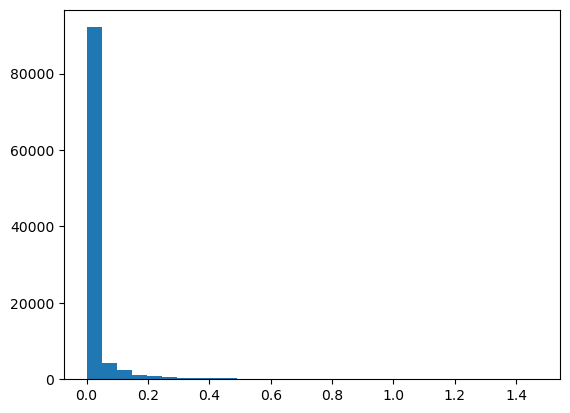

In [26]:
from matplotlib import pyplot as plt
plt.hist(error1, bins=30)

In [18]:
anomaly_df = pd.DataFrame(df[time_steps:])

In [27]:
joblib.dump(border1, "C:\\Internship\\meter_cutoff.pkl")

['C:\\Internship\\meter_cutoff.pkl']

In [19]:
anomaly_df['MSE1'] = error1
border1 = np.percentile(error1,99.5)
anomaly_df['error_cutoff1'] = border1
anomaly_df['anomaly1'] = anomaly_df['MSE1'] > anomaly_df['error_cutoff1']
anomaly_df['curr_w'] = scaler.inverse_transform(anomaly_df[['curr_w']])

In [20]:
anomaly_df

,date,curr_w,MSE1,error_cutoff1,anomaly1
30,2023-01-01 07:45:00 -0800,0.0,0.000042,0.531637,False
31,2023-01-01 08:00:00 -0800,4.0,0.000042,0.531637,False
32,2023-01-01 08:15:00 -0800,15.0,0.000045,0.531637,False
33,2023-01-01 08:30:00 -0800,24.0,0.000079,0.531637,False
34,2023-01-01 08:45:00 -0800,26.0,0.000086,0.531637,False
...,...,...,...,...,...
103141,2024-06-21 12:30:00 -0700,703.0,0.008213,0.531637,False
103142,2024-06-21 12:45:00 -0700,739.0,0.008595,0.531637,False
103143,2024-06-21 13:00:00 -0700,758.0,0.009013,0.531637,False
103144,2024-06-21 13:15:00 -0700,805.0,0.009203,0.531637,False


In [21]:
anomaly1 = anomaly_df.loc[anomaly_df['anomaly1'] == True]

In [59]:
anomaly_df.replace([np.inf, -np.inf], np.nan, inplace=True)
anomaly1.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_33340\1891253063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly1.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_33340\1891253063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly2.replace([np.inf, -np.inf], np.nan, inplace=True)


In [24]:
import seaborn as sns

C:\Users\adity\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adity\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='curr_w'>

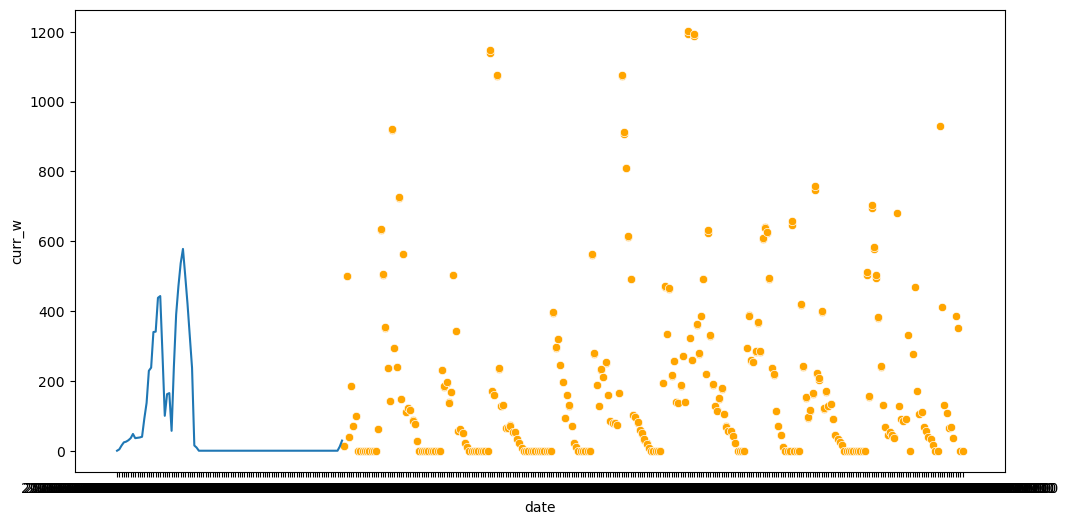

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=anomaly_df['date'].iloc[:100], y=anomaly_df['curr_w'].iloc[:100])
sns.scatterplot(x=anomaly1['date'], y=anomaly1['curr_w'], color='orange')